<a href="https://colab.research.google.com/github/xVoidDevilx/ml-cs-ut/blob/main/animal_shelter_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the Dataset and Problem

### Description
"Every year, approximately 7.6 million companion animals end up in US shelters. Many animals are given up as unwanted by their owners, while others are picked up after getting lost or taken out of cruelty situations. Many of these animals find forever families to take them home, but just as many are not so lucky. 2.7 million dogs and cats are euthanized in the US every year.

Using a dataset of intake information including breed, color, sex, and age from the Austin Animal Center, we're asking Kagglers to predict the outcome for each animal.

We also believe this dataset can help us understand trends in animal outcomes. These insights could help shelters focus their energy on specific animals who need a little extra help finding a new home. We encourage you to publish your insights on Scripts so they are publicly accessible."
- https://www.kaggle.com/competitions/shelter-animal-outcomes/overview
- Austin Animal Center

### Data
"The data comes from Austin Animal Center from October 1st, 2013 to March, 2016. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake.

In this competition, you are going to predict the outcome of the animal as they leave the Animal Center. These outcomes include: Adoption, Died, Euthanasia, Return to owner, and Transfer.

The train and test data are randomly split."
- https://www.kaggle.com/competitions/shelter-animal-outcomes/overview
- Austin Animal Center

# Loading the Dataset

In [ ]:
"""
include the essential libraries
"""
from sklearn.metrics import pairwise_distances_chunked
from numpy import argpartition
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Preparing the Dataset

In [ ]:
# get the base path
basepath = os.getcwd()
# join the directories for the csv
train_dir = os.path.join(basepath, 'train')
test_dir = os.path.join(basepath, 'test')
# verify the directory exists
if not (os.path.exists(train_dir) and os.path.exists(test_dir)):
    raise OSError(f'Directory does not exist: {train_dir} | {test_dir}')
# verify the files exist
train_csv = os.path.join(train_dir, 'train.csv')
test_csv = os.path.join(test_dir, 'test.csv')
if not (os.path.isfile(train_csv) and os.path.isfile(test_csv)):
    raise OSError(f'Dataset files do not exist: {train_csv} | {test_csv}')

In [ ]:
# open the csvs into dataframes
traindf = pd.read_csv(train_csv)
testdf = pd.read_csv(test_csv)

# Taking a look at the Data

In [ ]:
traindf

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [ ]:
testdf

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...,...
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan


In [ ]:
traindf.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [ ]:
# testdf.describe() - unusally brings up statistics only on the ID column

In [ ]:
# lets look @ some counts
def explain_cols(df):
    for col in df.columns:
        print(df[col].value_counts().sort_values(ascending=False), end='\n\n')

In [ ]:
explain_cols(traindf)

AnimalID
A671945    1
A690480    1
A667013    1
A677334    1
A699218    1
          ..
A718934    1
A698128    1
A677478    1
A519949    1
A706629    1
Name: count, Length: 26729, dtype: int64

Name
Max             136
Bella           135
Charlie         107
Daisy           106
Lucy             94
               ... 
Charlie Roge      1
Lucrecia          1
Gertrude          1
Schultz           1
Green Bean        1
Name: count, Length: 6374, dtype: int64

DateTime
2015-08-11 00:00:00    19
2015-11-17 00:00:00    17
2015-07-02 00:00:00    13
2015-04-02 00:00:00    11
2014-08-31 09:00:00    10
                       ..
2014-10-23 11:59:00     1
2014-09-09 13:30:00     1
2014-03-02 16:21:00     1
2015-12-16 19:39:00     1
2014-04-27 12:22:00     1
Name: count, Length: 22918, dtype: int64

OutcomeType
Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: count, dtype: int64

OutcomeSubtype
Partner                7

In [ ]:
explain_cols(testdf)

ID
1        1
44       1
22       1
11       1
3        1
        ..
11450    1
11451    1
11452    1
11453    1
11456    1
Name: count, Length: 11456, dtype: int64

Name
Bella         60
Charlie       56
Daisy         42
Princess      42
Luna          40
              ..
Samuari        1
Scally Wag     1
Huffy          1
Riko           1
Gusto          1
Name: count, Length: 3712, dtype: int64

DateTime
2015-07-02 00:00:00    8
2014-10-20 09:00:00    8
2014-09-23 09:00:00    7
2016-01-25 00:00:00    6
2015-09-05 09:00:00    6
                      ..
2015-07-25 15:03:00    1
2015-11-03 18:33:00    1
2015-04-06 14:33:00    1
2014-07-11 07:15:00    1
2014-07-12 18:40:00    1
Name: count, Length: 10575, dtype: int64

AnimalType
Dog    6656
Cat    4800
Name: count, dtype: int64

SexuponOutcome
Neutered Male    4235
Spayed Female    3813
Intact Female    1493
Intact Male      1460
Unknown           455
Name: count, dtype: int64

AgeuponOutcome
1 year       1768
2 years      1641
2 months  

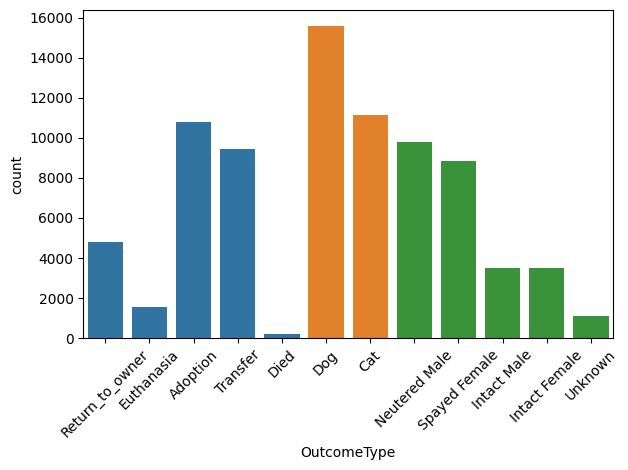

In [ ]:
sns.countplot(x='OutcomeType', data=traindf)
sns.countplot(x='AnimalType', data=traindf)
sns.countplot(x='SexuponOutcome', data=traindf)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print('Train Dataset:')
traindf.info()

Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnimalID        26729 non-null  object
 1   Name            19038 non-null  object
 2   DateTime        26729 non-null  object
 3   OutcomeType     26729 non-null  object
 4   OutcomeSubtype  13117 non-null  object
 5   AnimalType      26729 non-null  object
 6   SexuponOutcome  26728 non-null  object
 7   AgeuponOutcome  26711 non-null  object
 8   Breed           26729 non-null  object
 9   Color           26729 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [ ]:
print('Test Dataset:')
testdf.info()

Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11456 non-null  int64 
 1   Name            8231 non-null   object
 2   DateTime        11456 non-null  object
 3   AnimalType      11456 non-null  object
 4   SexuponOutcome  11456 non-null  object
 5   AgeuponOutcome  11450 non-null  object
 6   Breed           11456 non-null  object
 7   Color           11456 non-null  object
dtypes: int64(1), object(7)
memory usage: 716.1+ KB


# Cleaning the Dataset

To continue with any further analysis, the dataset is going to need to be cleaned. Most of the columns are strings type and categorical. Or there is numeric information that needs to be extracted, such as age.

> It's apparent that the dataset only considers dogs and cats. The categorical outcomes, represented in blue, are largely imbalanced. Thankfully, not many appear to pass away in the Austin Animal Center. But this will need to be addressed in how we train the

> Further, there are a few null values present in the table, like with name & sex upon outcome, and outcomesubtypes

In [ ]:
"""
First, since there is only one value where the SexUponOutcome
is null, lets investigate if it's worth dropping it since we still have 26729 samples
"""
traindf.loc[traindf['SexuponOutcome'].isna()]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3174,A667395,Diego,2013-11-27 16:11:00,Return_to_owner,NaN,Dog,NaN,7 years,Dachshund,Brown Merle


As we can see, 'Diego' belongs to the Return_to_owner class. 3rd largest class,
is part of the larger of the two groups of animals (Dog|Cat), and likely doesn't provide vital information to the model.

Further, this 1 exception among both subsets of the data leads me to believe Austin Animal Shelter is rather vigilant about recording this feature anyways. So it would be unlikely that future samples would have this feature nulled.

In [ ]:
traindf = traindf.dropna(subset=['SexuponOutcome'], ignore_index=True)
testdf = testdf.dropna(subset=['SexuponOutcome'], ignore_index=True)
print(traindf.shape)
print(testdf.shape)

(26728, 10)
(11456, 8)


Next, we fill in the names of the animals with null values with 'unnamed' because there really isn't much alternative for option here. It would be unwise to drop the samples entirely, as there are a large number of them and we need as much data as possible.

In [ ]:
traindf['Name'] = traindf['Name'].fillna('unnamed')
testdf['Name'] = testdf['Name'].fillna('unnamed')
traindf.head()

<ipython-input-16-017fc5d68a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Name'] = traindf['Name'].fillna('unnamed')


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [ ]:
testdf.tail()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
11451,11452,unnamed,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,unnamed,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,unnamed,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan
11455,11456,Gusto,2014-07-12 18:40:00,Dog,Intact Male,4 years,Labrador Retriever,Cream


Now for outcome subtype. I would like to point out that in the data obsereved, that the subtype appears to be more or less a condition or history the animal at the center was recorded to be in such as suffering, Foster, or perhaps an illness

This is likely an important feature, because humans may be more or less likely to adopt an animal with a little more history to them than an animal with no background. However, filling these simply with a copy of the first outcome sounds like a poor decision because it may unintentionally allow that feature to become heavier than others by a considerable amount in various algorithms.

However, there isn't anything about the animal's history we can assume from the data. Therefore, filling 'no history' should suffice. To preface, I initially thought that subtype outcomes would only be observed in cases where the animal was not later deceased, but that work will be shown below proving otherwise

In [ ]:
traindf.loc[traindf['OutcomeSubtype'].isna()]['OutcomeType'].value_counts().sort_values(ascending=False)

,count
OutcomeType,
Adoption,8803
Return_to_owner,4785
Died,16
Transfer,6
Euthanasia,1


In [ ]:
# filling with no history
traindf['OutcomeSubtype'] = traindf['OutcomeSubtype'].fillna('no history')
traindf.head()

<ipython-input-19-8d13160e245f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['OutcomeSubtype'] = traindf['OutcomeSubtype'].fillna('no history')


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,no history,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [ ]:
"""
likewise, the testdf needs to assume no history, since we were not provided that feature
but will be using it in predictions
"""
testdf['OutcomeSubtype'] = 'no history'
testdf.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,OutcomeSubtype
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,no history
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,no history
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,no history
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,no history
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,no history


Finally, we need to process the missing ages. For this, we need to go ahead and make the values in the datasets numeric in nature. Group them by dog and cat categories, and get euclidean measures for distance.

- My rationale behind this is that we can compute distances between samples and take an average within a neighborhood of the closest samples.

- How does this make sense?
> Shelters and adoption centers commonly house animals with a variety of ages. However, the ages tend to be pretty close duing certain times of year, such as when adoption centers have a lot of puppies and kittens for adoption at once before an influx / surplus of elder animals are observed to be in a center. Have you ever noticed that visiting several shelter or center at different times, you may observe a lot more younger animals than older or vice versa?  This is an observation I made during my own adoption process with my adoptee cat, when there were a lot of kittens in the shelter with him, but plenty of elder dogs. At other times during my adoption story, the shelter would have lots of older cats but not a lot of kittens. I don't think its unreasonable to say that time of outcome has a large impact on the ages of animals that can be observed in the shelter together

- find evidence of this

In [ ]:
# Define conversion factors for time to months,
# this could be done better, but key - val hash is fine
# Conversion factors to months with both plural and non-plural keys
conversion_factors = {
    'day': 1 / 30,        # 1 day = 1/30 months (approximately 0.0333)
    'days': 1 / 30,       # 1 day = 1/30 months (approximately 0.0333)
    'week': 1 / 4.33,     # 1 week = 1/4.33 months (approximately 0.2307)
    'weeks': 1 / 4.33,    # 1 week = 1/4.33 months (approximately 0.2307)
    'month': 1,           # 1 month = 1 month
    'months': 1,          # 1 month = 1 month
    'year': 12,           # 1 year = 12 months
    'years': 12           # 1 year = 12 months
}

# split the columns information
extracted = traindf['AgeuponOutcome'].str.split(' ', expand=True)
extracted[0] = extracted[0].astype('float64')
extracted[1]= extracted[1].astype('string')
extracted = extracted.rename(columns={0: 'age', 1:'unit'})
traindf = traindf.join(extracted)
traindf['age_months'] = traindf['age'] * traindf['unit'].map(conversion_factors)
traindf = traindf.drop(columns=['age', 'unit', 'AgeuponOutcome'], axis=1)
traindf.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,age_months
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,no history,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,12.000000
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,12.000000
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,24.000000
3,A683430,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.692841
4,A667013,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,24.000000


In [ ]:
# lets use some pre-built functions to change the remaining columns to their label types
# starting with the animal type, name, Breed and color
traindf['AnimalCode'] = pd.factorize(traindf['AnimalType'])[0]
traindf['NameCode'] = pd.factorize(traindf['Name'])[0]
traindf['BreedCode'] = pd.factorize(traindf['Breed'])[0]
traindf['ColorCode'] = pd.factorize(traindf['Color'])[0]
traindf['OutcomeTypeCode'] = pd.factorize(traindf['OutcomeType'])[0]
traindf['OutcomeSubtypeCode'] = pd.factorize(traindf['OutcomeSubtype'])[0]
# well go ahead and drop the ID, it isn't going to give us information about the animal and its more of an index
traindf = traindf.drop(columns=['AnimalID'], axis=1)
traindf.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,age_months,AnimalCode,NameCode,BreedCode,ColorCode,OutcomeTypeCode,OutcomeSubtypeCode
0,Hambone,2014-02-12 18:22:00,Return_to_owner,no history,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,12.000000,0,0,0,0,0,0
1,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,12.000000,1,1,1,1,1,1
2,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,24.000000,0,2,2,2,2,2
3,unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.692841,1,3,1,3,3,3
4,unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,24.000000,0,3,3,4,3,3


In [ ]:
# One last thing, we need to convert the date-time of adoptions.
# Whether an animal is adopted or not may vary based on date and time.
# I'm not sure if date AND time together should be considered, so split the date and time
# so we can weight their importance.
traindf['DateTime'] = pd.to_datetime(traindf['DateTime'])
traindf['Date'], traindf['Time'] = traindf['DateTime'].dt.date, traindf['DateTime'].dt.time

# Extract various date and time components
traindf['year'] = traindf['DateTime'].dt.year
traindf['month'] = traindf['DateTime'].dt.month
traindf['day'] = traindf['DateTime'].dt.day
traindf['hour'] = traindf['DateTime'].dt.hour

In [ ]:
# repeat for test data
extracted = testdf['AgeuponOutcome'].str.split(' ', expand=True)
extracted[0] = extracted[0].astype('float64')
extracted[1]= extracted[1].astype('string')
extracted = extracted.rename(columns={0: 'age', 1:'unit'})
testdf = testdf.join(extracted)
testdf['age_months'] = testdf['age'] * testdf['unit'].map(conversion_factors)
testdf = testdf.drop(columns=['age', 'unit', 'AgeuponOutcome'], axis=1)

# lets use some pre-built functions to change the remaining columns to their label types
# starting with the animal type, name, Breed and color
testdf['AnimalCode'] = pd.factorize(testdf['AnimalType'])[0]
testdf['NameCode'] = pd.factorize(testdf['Name'])[0]
testdf['BreedCode'] = pd.factorize(testdf['Breed'])[0]
testdf['ColorCode'] = pd.factorize(testdf['Color'])[0]
# testdf['OutcomeTypeCode'] = pd.factorize(testdf['OutcomeType'])[0] < - we are predicting this
testdf['OutcomeSubtypeCode'] = 0 # no history is mapped to 0s

# well go ahead and drop the ID, it isn't going to give us information about the animal and its more of an index
testdf = testdf.drop(columns=['ID'], axis=1)

# One last thing, we need to convert the date-time of adoptions.
testdf['DateTime'] = pd.to_datetime(testdf['DateTime'])
testdf['Date'], testdf['Time'] = testdf['DateTime'].dt.date, testdf['DateTime'].dt.time

# Extract various date and time components
testdf['year'] = testdf['DateTime'].dt.year
testdf['month'] = testdf['DateTime'].dt.month
testdf['day'] = testdf['DateTime'].dt.day
testdf['hour'] = testdf['DateTime'].dt.hour
testdf.head()

,Name,DateTime,AnimalType,SexuponOutcome,Breed,Color,OutcomeSubtype,age_months,AnimalCode,NameCode,BreedCode,ColorCode,OutcomeSubtypeCode,Date,Time,year,month,day,hour
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,Labrador Retriever Mix,Red/White,no history,10.0,0,0,0,0,0,2015-10-12,12:15:00,2015,10,12,12
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,German Shepherd/Siberian Husky,Black/Tan,no history,24.0,0,1,1,1,0,2014-07-26,17:59:00,2014,7,26,17
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby,no history,12.0,1,2,2,2,0,2016-01-13,12:20:00,2016,1,13,12
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,Collie Smooth Mix,Tricolor,no history,4.0,0,3,3,3,0,2013-12-28,18:12:00,2013,12,28,18
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,Miniature Poodle Mix,White,no history,24.0,0,4,4,4,0,2015-09-24,17:59:00,2015,9,24,17


In [ ]:
train_set = traindf.select_dtypes(['number'])
traindf = traindf.select_dtypes(['object'])

In [ ]:
test_set = testdf.select_dtypes(['number'])
testdf = testdf.select_dtypes(['object'])

In [ ]:
# remove the column age since na values.
distance_matrix = train_set.drop(columns=['age_months'], axis=1)

# compute pairwise distances
distance_matrix = pairwise_distances_chunked(distance_matrix)

distances = []
for chunk in distance_matrix:
  # I do this so that the size can be cut down and fit into a single matrix
  # by reducing the size by a factor of 2, since the age average will be averaged anyways and
  # fractional ages of a month past 32 bits doesn't sound reasonable
  distances.append(chunk.astype(np.float32))
distances = np.concatenate(distances)
np.fill_diagonal(distances, np.inf) # so this index won't be grabbed later, done in place

In [ ]:
# select k values to average over
k = 5
na_indices = train_set.index[train_set['age_months'].isna()].to_list()
# stop datapoints with missing values from being close with each other
distances = pd.DataFrame(distances)
distances = distances.drop(na_indices, axis=1)

# since we are only interested in the rows that are missing age values, lets get those indices and free memory
interests = distances.iloc[na_indices]
close_points = []
for na_index, (_, row) in zip(na_indices, interests.iterrows()):
  close_points.append(row.nsmallest(k).index)
del interests
del distance_matrix

In [ ]:
close_points = pd.DataFrame(close_points, index=na_indices)
close_points

,0,1,2,3,4
2480,15489,11033,5018,25289,12569
2912,15493,13668,14690,17192,24568
3765,26184,5380,1556,13316,24399
3874,21029,12215,21625,19999,16786
4497,345,3746,14755,15303,21022
5136,17263,20487,4737,6791,15777
5690,9118,3004,20365,3969,7094
7004,17263,20487,4737,6791,15777
8419,15489,11033,5018,25289,12569
17463,2992,6953,6540,11066,16693


In [ ]:
# we can see the values don't contain themselves or each other in the output. Horray!
# Now to extract the ages from the set and average them >:)
for ind, row in close_points.iterrows():
    train_set.at[ind, 'age_months'] = train_set.iloc[row]['age_months'].mean()

train_set.info() # to verify all the nulls were filled :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26728 entries, 0 to 26727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_months          26728 non-null  float64
 1   AnimalCode          26728 non-null  int64  
 2   NameCode            26728 non-null  int64  
 3   BreedCode           26728 non-null  int64  
 4   ColorCode           26728 non-null  int64  
 5   OutcomeTypeCode     26728 non-null  int64  
 6   OutcomeSubtypeCode  26728 non-null  int64  
 7   year                26728 non-null  int32  
 8   month               26728 non-null  int32  
 9   day                 26728 non-null  int32  
 10  hour                26728 non-null  int32  
dtypes: float64(1), int32(4), int64(6)
memory usage: 1.8 MB


In [ ]:
# repeating for the test set.

# remove the column age since na values.
distance_matrix = test_set.drop(columns=['age_months'], axis=1)

# compute pairwise distances
distance_matrix = pairwise_distances_chunked(distance_matrix)

distances = []
for chunk in distance_matrix:
  # I do this so that the size can be cut down and fit into a single matrix
  # by reducing the size by a factor of 2, since the age average will be averaged anyways and
  # fractional ages of a month past 32 bits doesn't sound reasonable
  distances.append(chunk.astype(np.float32))
distances = np.concatenate(distances)
np.fill_diagonal(distances, np.inf) # so this index won't be grabbed later, done in place

# select k values to average over
k = 5
na_indices = test_set.index[test_set['age_months'].isna()].to_list()
# stop datapoints with missing values from being close with each other
distances = pd.DataFrame(distances)
distances = distances.drop(na_indices, axis=1)

# since we are only interested in the rows that are missing age values, lets get those indices and free memory
interests = distances.iloc[na_indices]
close_points = []
for na_index, (_, row) in zip(na_indices, interests.iterrows()):
  close_points.append(row.nsmallest(k).index)
del interests
del distance_matrix

close_points = pd.DataFrame(close_points, index=na_indices)
close_points



,0,1,2,3,4
763,2149,3166,427,5603,9286
2498,4612,1750,3965,9526,5147
6323,8052,8852,9185,19,5713
6347,11036,6833,1014,9200,11243
7626,5603,2149,7027,427,8264
10754,4166,6847,9191,9579,4927


In [ ]:
# we can see the values don't contain themselves or each other in the output. Horray!
# Now to extract the ages from the set and average them >:)
for ind, row in close_points.iterrows():
    test_set.at[ind, 'age_months'] = test_set.iloc[row]['age_months'].mean()

test_set.info() # to verify all the nulls were filled :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_months          11456 non-null  float64
 1   AnimalCode          11456 non-null  int64  
 2   NameCode            11456 non-null  int64  
 3   BreedCode           11456 non-null  int64  
 4   ColorCode           11456 non-null  int64  
 5   OutcomeSubtypeCode  11456 non-null  int64  
 6   year                11456 non-null  int32  
 7   month               11456 non-null  int32  
 8   day                 11456 non-null  int32  
 9   hour                11456 non-null  int32  
dtypes: float64(1), int32(4), int64(5)
memory usage: 716.1 KB


Might wonder why I didn't use groupby to weigh cat ages with cat ages and dog ages with dog ages.

Well, you see, already making an assumption of the age like this is is likely to not hold much merit and be worth that effort upfront. It was also a small subset of the data (18 samples)

> Later, I will try grouping to see if dogs and cats have different features that make them become adopted. Such as cats being more dependent on age and dogs with background or something.

# Statistical look at the Data

Now that we have the data in all-numeric values we can interpret and compute with,
we can plot a lot more than before! Hopefully we observe some interesting trends with the data

For simplicity, I will use the traindf and testdf to keep track of our original labels, like 'dog' and 'cat' so we don't get lost in all the numbered codes.

# Initial ML Analysis

# Feature Engineering

# HyperParameter Tuning

# Conclusions